## Sorting

### swap

In [1]:
def swap(li, i, j):
    """
    Exchange the ith item and jth item in list li
    """
    
    tmp = li[i]
    li[i] = li[j]
    li[j] = tmp

In [2]:
# python sytle

def swapPython(li, i, j):
    li[i], li[j] = li[j], li[i]

### Selection Sort

For each round, select the smallest item and swap it to the correct position.

In [3]:
def secectionSort(li):
    """
    for each round, find the smallest one and put it at the right place.
    """
    
    i = 0 # current position
    
    while i < len(li): # rounds: 0 ~ len(li)-1
        
        # find the smallest one starting from the current position
        j = i
        minIndex = j # = i
        while j < len (li):
            if li[j] < li[minIndex]: # find smaller one
                minIndex = j
            j += 1
        
        # swap the smallest one to the current position
        swap(li, minIndex, i)
            
        # next round
        i += 1

In [4]:
# Q: best case? worst case? average case?

In [5]:
# Of course, you can select the largetest one and swap it.
# http://interactivepython.org/runestone/static/pythonds/SortSearch/TheSelectionSort.html
def secectionSort2(li):
    """
    for each round, find the largest one and put it at the right place.
    """

    for pos in range(len(li)-1, -1, -1):
        maxIndex = pos
        for item in range(pos, -1, -1):
            if li[item] > li[maxIndex]:
                maxIndex = item
        swap(li, maxIndex, pos)

In [6]:
li = [23, 654, 21, 143, 3, 82, 26, 4123]

secectionSort(li)
print(li)

[3, 21, 23, 26, 82, 143, 654, 4123]


In [7]:
li = [23, 654, 21, 143, 3, 82, 4123, 26]

secectionSort2(li)
print(li)

[3, 21, 23, 26, 82, 143, 654, 4123]


### Ramdom

In [8]:
import random
# Return the next random floating point number in the range [0.0, 1.0).
r = random.random()
print(r)

0.9176620516100372


In [9]:
random.uniform(2.5, 10.0) # Random float:  2.5 <= x < 10.0

4.637111592894645

In [10]:
random.randrange(10) # Integer from 0 to 9 inclusive

4

In [11]:
random.randrange(0, 101, 2) # Even integer from 0 to 100 inclusive

20

In [12]:
li = ['win', 'lose', 'draw']
random.choice(li) # Single random element from a sequence

'draw'

In [13]:
li = ['win', 'lose', 'draw']
random.choices(li, k = 2)

['draw', 'lose']

In [14]:
li = [10, 20, 30, 40, 50]
random.sample(li, k = 4) # Four samples without replacement

[50, 20, 10, 40]

In [15]:
li = [10, 20, 30, 40, 50]
random.shuffle(li)
print(li)

[40, 20, 10, 50, 30]


In [16]:
random.seed(1)
random.random()

0.13436424411240122

In [17]:
# how to generate a list of random numbers?
li = [random.randrange(1000) for _ in range(1000)]

### Selection Sort 1&2

In [18]:
%timeit secectionSort(li)

85.8 ms ± 582 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%timeit secectionSort2(li)

31.4 ms ± 424 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Bubble Sort
The worest sorting method XD

In [20]:
# for each round (i), put the largest item to the designed place.

def bubbleSort(li):
    for i in range(len(li)):
        for j in range(i):
            if li[i] < li[j]: # change to > for descending
                li[i], li[j] = li[j], li[i]

In [21]:
li = [23, 654, 21, 143, 3, 82, 4123, 26]

bubbleSort(li)
print(li)

[3, 21, 23, 26, 82, 143, 654, 4123]


In [22]:
# http://interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html

### Insertion Sort

For each round, get next item and insert it into sorted list.

In [23]:
def insertionSort(li):
    for sortedIndex in range(1, len(li) - 1):
        targetIndex = sortedIndex + 1
        for i in range(0, sortedIndex + 1):
            if li[targetIndex] > li[i]:
                pass
            else:
                swapPython(li, i, targetIndex)

In [24]:
li = [23, 654, 21, 143, 3, 82, 4123, 26]

insertionSort(li)
print(li)

[3, 21, 23, 26, 82, 143, 654, 4123]


In [25]:
# http://interactivepython.org/runestone/static/pythonds/SortSearch/TheInsertionSort.html

### Even quicker sorting methods

So far, we introduce 3 sorting algorithms (selection, bubble, insertion) that all have $O(n^2)$ time complexity. Of course, there are several variants that can improve the efficiency. However, the worst cases are still $O(n^2)$.

We now introduce two sorting algorithms (quick, merge) that are $O(n log n)$. They adopt the strategy of **divide-and-conquer**, which means they can divide the list into smaller sub-lists, sort the sub-lists and then combine the sorted sub-lists. If the complexity of sorting the sub-lists is $n$ and the complexity of dealing with the sub-lists is $log n$, then the entire complexity is $n log n$.

There is anothter sorting algorithm (heapsort) that will be introduced later.

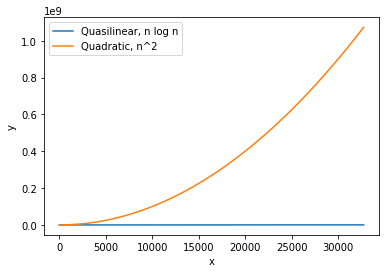

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0.000001, 32768.0, 100)

quasilinear = x * np.log(x)
quadratic = np.power(x, 2)

plt.plot(x, quasilinear, label='Quasilinear, n log n')
plt.plot(x, quadratic, label='Quadratic, n^2')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Quick Sort
http://interactivepython.org/runestone/static/pythonds/SortSearch/TheQuickSort.html

Select a pivot.
Move items less than Pivot to its left; move items larger than Pivot to its right.

Note that the above URL shows another version of Quick Sort implementation.

In: [23, 654, 21, 143, 3, 82, 4123, 26]

Pivot: 143

Ot: [23, 26, 21, 82, 3, 143, 4123, 654]

In [27]:
def quickSort(li):
    quickSortHelper(li, 0, len(li) -1)
    
def quickSortHelper(li, left, right):
    if left < right:
        pivot = partition_2(li, left, right)
        quickSortHelper(li, left, pivot - 1)
        quickSortHelper(li, pivot + 1, right)

def partition_2(li, left, right):
    # find the pivot and exchange it with the last (right) item
    mid = (left + right) // 2
    pivot = li[mid]
    li[mid], li[right] = li[right], li[mid] # swap
    print(pivot)
    print(li)
    
    # set boundary point to the fisrt (left) item
    # boundary keeps moving to the middle of the list
    # items at the left of the boundary are less than pivot
    # KEEP TRACKING boundary!
    boundary = left
    
    # move items less than pivot to the left
    for i in range(left, right):
        if li[i] < pivot:
            li[i], li[boundary] = li[boundary], li[i]
            boundary += 1
            print(li, boundary)
    
    # exchange pivot and boundary
    li[right], li[boundary] = li[boundary], li[right]
    
    return boundary

In [28]:
li = [23, 654, 21, 143, 3, 82, 4123, 26]

print(li)
quickSort(li)
print(li)

[23, 654, 21, 143, 3, 82, 4123, 26]
143
[23, 654, 21, 26, 3, 82, 4123, 143]
[23, 654, 21, 26, 3, 82, 4123, 143] 1
[23, 21, 654, 26, 3, 82, 4123, 143] 2
[23, 21, 26, 654, 3, 82, 4123, 143] 3
[23, 21, 26, 3, 654, 82, 4123, 143] 4
[23, 21, 26, 3, 82, 654, 4123, 143] 5
26
[23, 21, 82, 3, 26, 143, 4123, 654]
[23, 21, 82, 3, 26, 143, 4123, 654] 1
[23, 21, 82, 3, 26, 143, 4123, 654] 2
[23, 21, 3, 82, 26, 143, 4123, 654] 3
21
[23, 3, 21, 26, 82, 143, 4123, 654]
[3, 23, 21, 26, 82, 143, 4123, 654] 1
4123
[3, 21, 23, 26, 82, 143, 654, 4123]
[3, 21, 23, 26, 82, 143, 654, 4123] 7
[3, 21, 23, 26, 82, 143, 654, 4123]


### Merge Sort
http://interactivepython.org/runestone/static/pythonds/SortSearch/TheMergeSort.html

Divide and Conquer:

1) Find a mid
2) mergesort(left)
3) mergesort(right)
4) merge two parts with two pointers with additional spaces

In [29]:
def mergeSort(li):

    if len(li) > 1:
        mid = len(li) // 2
        lefthalf = li[:mid] # note: in python it's deep copy
        righthalf = li[mid:] # note: in python it's deep copy

        mergeSort(lefthalf)
        mergeSort(righthalf)
        
        # now we have two sorted lists to be merged!
        i = 0 # index for lefthalf
        j = 0 # index for righthalf
        k = 0 # index for li
        
        # i and j are both in the middle of lefthalf and righthalf, respectively
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                li[k] = lefthalf[i]
                i += 1
            else:
                li[k] = righthalf[j]
                j += 1
            k += 1

        # oops, righthalf is done; then we concatnate the rest of lefthalf to the end of li
        while i < len(lefthalf):
            li[k] = lefthalf[i]
            i += 1
            k += 1

        # oops, lefthalf is done; then we concatnate the rest of righthalf to the li
        while j < len(righthalf):
            li[k] = righthalf[j]
            j += 1
            k += 1

In [30]:
li = [54, 26, 93, 17, 77, 31, 44, 55, 20]
mergeSort(li)
print(li)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [31]:
# Mergesort needs more space to store lefthalf and righthalf.

### Class Sorted List

In [32]:
class SortedList:
    # variables
    li = None
    length = None
    
    # functions
    def __init__(self, data = None):
        if data == None:
            self.li = list()
            self.length = 0
        else:
            self.li = sorted(data)
            self.length = len(self.li)
            
    def __len__(self):
        return self.length
    
    def __str__(self):
        return str(self.li)
    
    def __binarySearchIndex(self, target):
        left = 0
        right = self.length - 1
        
        while left <= right:
            mid = (left + right) // 2
            
            if target == self.li[mid]:
                return mid
            elif target < self.li[mid]:
                right = mid - 1
            else:
                left = mid + 1
        # not found
        return left
        
    def add(self, newItem):
        index = self.__binarySearchIndex(newItem)
        self.li.insert(index, newItem)
        self.length += 1
        
    def clear(self):
        self.li.clear()
        self.length = 0
    
    def remove(self, item):
        # how to quickly find the item to be removed?
        pass

In [33]:
sl = SortedList()

In [34]:
sl.add(4)
print(sl)

[4]


### Divide and Conquer

See "Introduction to Algorithms: A Creative Approach" by Udi Manber

In a divide-and-conquer algorithm, the problem is divided into smaller sub-problems, each sub-problems is sovled recursively, and a *combine* algorithm is used to solve the original problem. Assume that there are $a$ sub-problem, each of size $1/b$ of the original problrm, anf that the algorithm used to combine the solutions of the sub-problems runs in time $c*n^k$, for some constants $a$, $b$, $c$, and $k$. The running time $T(n)$ of the algorithmt thus satisfies

$T(n) = a*T(n/b) + c*n^k$

We assume, for simplicity, that $n = b^m$, so that $n/b$ is always an integer ($b$ is an integer greater than 1). Then

$T(n) = a*(a*T(n/b^2) + c*(n/b)^k) + c*n^k$ 

$T(n) = a(a(a*T(n/b^3) + c*(n/b^2)^k) + c*(n/b)^k) + c*n^k$

In general, if we expand all the way to $n/b^m = 1$, we get

$T(n) = a(a(\dots*T(n/b^m) + c*(n/b^{m-1})^k) + \dots ) + c*n^k$

Let's assume that $T(1) = c$, then

$T(n) = c*a^m + c*a^{m-1} b^k + c*a^{m-2}b^{2k} + \dots + c*b^{mk}$

$T(n) = c\sum_{i=0}^{m} a^{m-i}*b^{ik} = c*a^m\sum_{i=0}^{m}(\frac{b^k}{a})^i$

Case 1: $a > b^k$

In this case, the geometric series converges to a constant even if $m$ goes to infinity. Therefore, $T(n) = O(a^m)$. Since $m = log_bn$, we get $a^m = a^{log_bn} = n^{log_ba}$. Thus

$T(n) = O(n^{log_ba})$

Case 2: $a = b^k$

$T(n) = O(a^mm)$. Since $a = b^k$, $log_ba = k$ and $m = O(logn)$, thus

$T(n) = O(n^k logn)$

Case 3: $a < b^k$

Let $F = b^k/a$, 

$T(n) = a^m*\frac{F^{m+1}-1}{F-1} = O(a^m * F^m) = O((b^k)^m) = O((b^m)^k) = O(n^k)$

Theorem

The solution of the recueernce realtion $T(n) = aT(n/b) + cn^k$, where $a$ and $b$ are integer constants, $a \geq 1, b \geq 2$, and $c$ and $k$ are positive constants, is

\begin{equation}
T(n) = 
\begin{cases}
    O(n^{log_ba}) & \text{if $a > b^k$}\\
    O(n^k logn) & \text{if $a = b^k$} \\
    O(n^k) & \text{if $a < b^k$}
\end{cases}
\end{equation}